# Install and Load Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Internet Service Provider Customer Churn

## Overview

Internet Service Provider Customer Churn dataset contain basic information for internet service subscriber. The goal is to find a subscriber will churn or not.

-------
**Columns:**
* **id** : unique subscriber id
* **is_tv_subscriber** : Indicates whether the customer has a  tv subscription.
* **is_movie_package_subscriber** : Indicates whether the customer has a  movie package subscription.
* **subscription_age** : how many year has the customer use our service
* **bill_avg** : average bill amount for the last 3 months
* **reamining_contract** : Number of years remaining on the customer's contract. If null, the customer does not have a contract. The customer who has a contract time have to use their service until contract end. If they canceled their service before contract time end they pay a penalty fare.
* **service_failure_count** : Number of times the customer contacted the call center for service failures for the last 3 months
* **download_avg** : internet usage (in GB) for the last 3 months
* **upload_avg** : average upload data (in GB) for the last 3 months
* **download_over_limit** : each customer have a download limit and they must pay extra if they exceed this limit
* **churn** : Indicate whether or not the customer has canceled their service (1 for customers who have canceled).

## Understanding the dataset

### Dataset Information

In [2]:
df=pd.read_csv('/content/internet_service_churn.csv')

In [3]:
#display the top row
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [4]:
#display the last row
df.tail()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1
72273,1689744,1,1,0.01,0,0.82,0,0.0,0.0,0,1


In [5]:
#get the size of the dataset
df.shape

(72274, 11)

the dataset has 72.274 rows and 11 columns

In [6]:
#get list of columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


the dataset contains 11 columns, with 4 columns of float type and 7 columns of integer type

### Descriptive Statistic

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


### Check Unique Value

In [8]:
#count unique value in each column
df.nunique()

,0
id,72274
is_tv_subscriber,2
is_movie_package_subscriber,2
subscription_age,1110
bill_avg,179
reamining_contract,247
service_failure_count,19
download_avg,2856
upload_avg,802
download_over_limit,8


## Data Preprocessing

### Check Missing Value

In [9]:
df.isnull().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,21572
service_failure_count,0
download_avg,381
upload_avg,381
download_over_limit,0


In [10]:
df.isnull().sum()/len(df)*100

,0
id,0.000000
is_tv_subscriber,0.000000
is_movie_package_subscriber,0.000000
subscription_age,0.000000
bill_avg,0.000000
reamining_contract,29.847525
service_failure_count,0.000000
download_avg,0.527161
upload_avg,0.527161
download_over_limit,0.000000


there are missing values ​​in the reamining_contract column total of 21,572 rows or around 29,8%, in the download_avg and upload_avg columns total of 381 rows or around 0,52%. The missing values must be handled with the right method

#### Handled Missing Value

In [11]:
#change the missing value for remaining_contract column
#the blank values means the customers doesn't have a contract
#so the blank values can be filled with 0

df['reamining_contract'].fillna(0, inplace=True)

In [12]:
#change the missing value for download_avg column and upload_avg
#fill the blank with median value
df['download_avg'].fillna(df['download_avg'].median(), inplace=True)

df['upload_avg'].fillna(df['upload_avg'].median(), inplace=True)

In [13]:
df.isnull().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,0
service_failure_count,0
download_avg,0
upload_avg,0
download_over_limit,0


This data has been cleaned of missing values.

### Check Duplicate Data

In [14]:
#to know if there is duplicated data
print("total duplicated values: ", df.duplicated().sum())

total duplicated values:  0


there is no duplicated values in this dataset

### Check Outlier

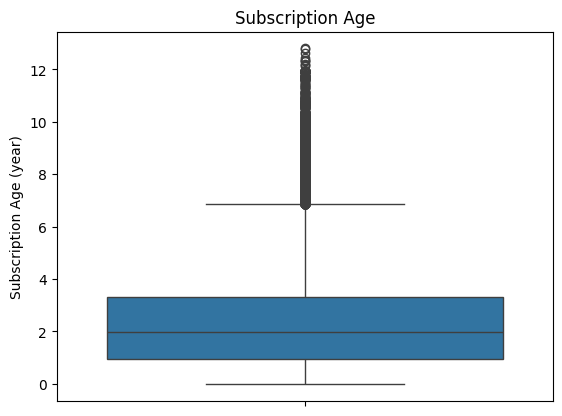

In [15]:
sns.boxplot(df['subscription_age'])
plt.title('Subscription Age')
plt.ylabel('Subscription Age (year)')
plt.show()

There are outliers in subscription age but that is normal because each customer's subscription preferences are different.

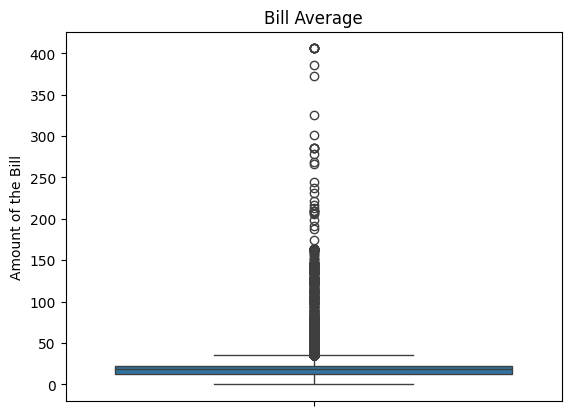

In [16]:
sns.boxplot(df['bill_avg'])
plt.title('Bill Average')
plt.ylabel('Amount of the Bill')
plt.show()

There are outliers in the average bill but that is normal as billing costs depend on the amount of data used.

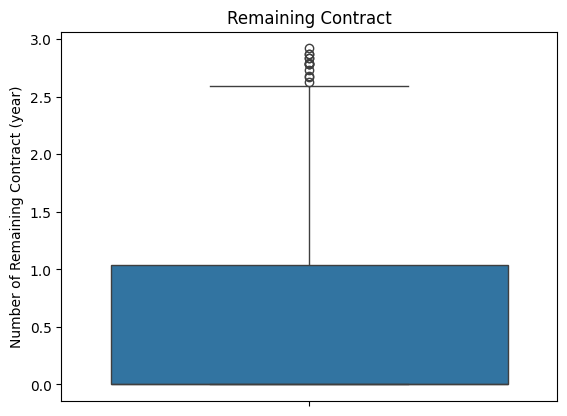

In [17]:
sns.boxplot(df['reamining_contract'])
plt.title('Remaining Contract')
plt.ylabel('Number of Remaining Contract (year)')
plt.show()

there are outlier in remaining contract

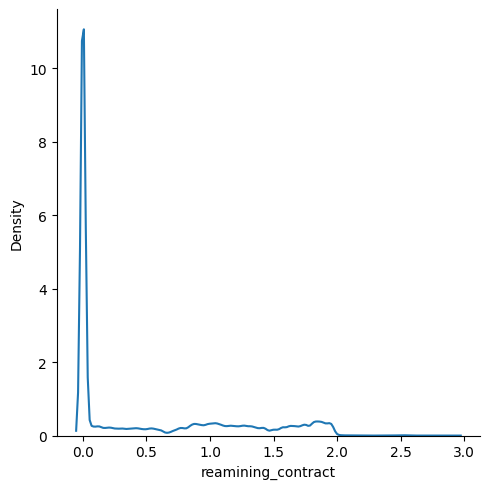

In [18]:
sns.displot(data=df, x='reamining_contract', kind="kde", bw_adjust=.25)

distplot shows that reamining_contract is not normally distributed but is positively skewed

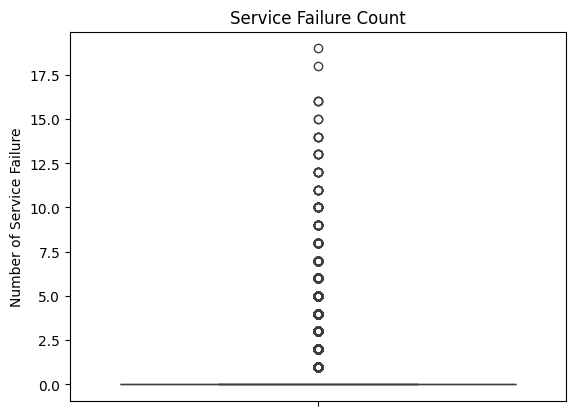

In [19]:
sns.boxplot(df['service_failure_count'])
plt.title('Service Failure Count')
plt.ylabel('Number of Service Failure')
plt.show()

There are outliers in the number of service failures but that is normal as the challenges faced by each customer are different.

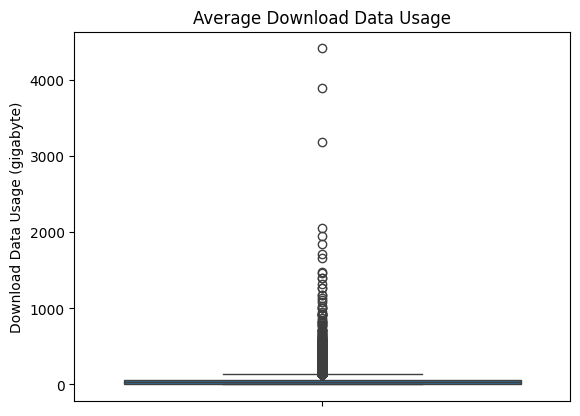

In [20]:
sns.boxplot(df['download_avg'])
plt.title('Average Download Data Usage')
plt.ylabel('Download Data Usage (gigabyte)')
plt.show()

There are outliers in the average download data usage, but this is normal as the amount of data downloaded by each customer varies.

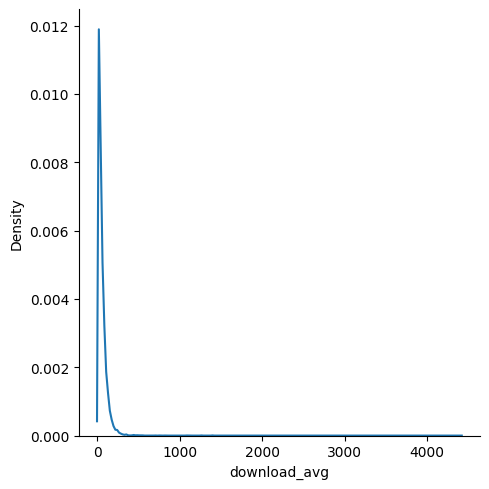

In [21]:
sns.displot(data=df, x='download_avg', kind="kde", bw_adjust=.25)

distplot shows that download_avg is not normally distributed but is positively skewed

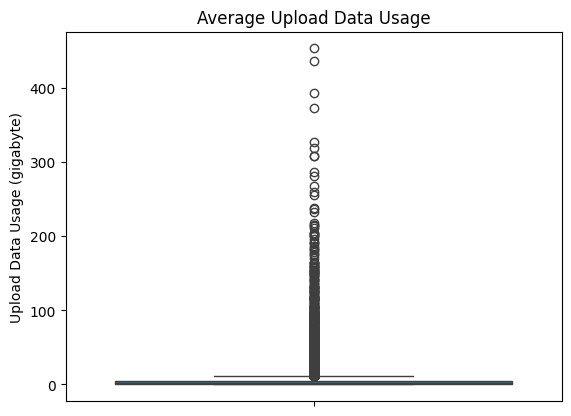

In [22]:
sns.boxplot(df['upload_avg'])
plt.title('Average Upload Data Usage')
plt.ylabel('Upload Data Usage (gigabyte)')
plt.show()

There are outliers in the average upload data usage, but this is normal as the amount of data uploaded by each customer varies.

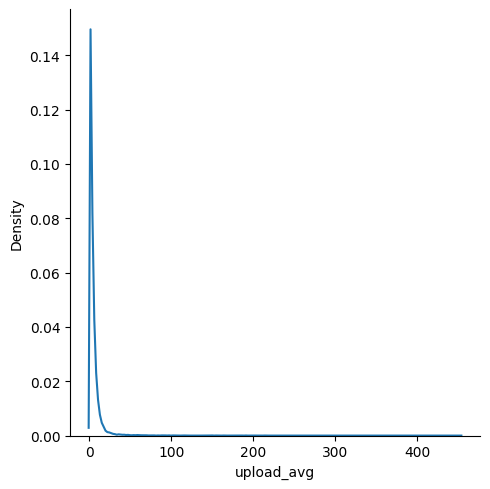

In [23]:
sns.displot(data=df, x='upload_avg', kind="kde", bw_adjust=.25)

distplot shows that upload_avg is not normally distributed but is positively skewed

In conclusion, **no data should be deleted because all data can provide important information.**

### Handling Abnormal Data

In [24]:
#check to see if there is subscription age below 0 or minus
df[df['subscription_age'] < 0]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
69320,1621523,0,0,-0.02,0,0.08,0,32.6,1.3,0,1


There is subscription age = -0,02 year or below 0 suggest that there an error. Subscription age represents the duration (in years) that a customer has been using the service, and it should be a non-negative number. So I would change the data with median value

In [25]:
#calculate the median value from subs age that above 0 years
#then fill the minus value with median value

median_subs_age = df[df['subscription_age'] >= 0]['subscription_age'].median()
df['subscription_age'] = df['subscription_age'].apply(lambda x: median_subs_age if x < 0 else x)

In [26]:
df[df['subscription_age'] < 0]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn


the abnormal data has been replaced

### Column Preprocessing

In [27]:
#rename the column for better understanding
df = df.rename(columns={
    'id' : 'customer_id',
    'reamining_contract' : 'remaining_contract'
})

#create new column namely 'subscribe'
#define conditions
conditions = [
    (df['is_tv_subscriber'] == 0) & (df['is_movie_package_subscriber'] == 0),
    (df['is_tv_subscriber'] == 1) & (df['is_movie_package_subscriber'] == 0),
    (df['is_tv_subscriber'] == 0) & (df['is_movie_package_subscriber'] == 1),
    (df['is_tv_subscriber'] == 1) & (df['is_movie_package_subscriber'] == 1)
]
choices = ['internet only', 'tv only', 'movie only', 'both']

#create new column called subscribe to know every customers subscribe to what
df['subscribe'] = np.select(conditions, choices)

## Final Dataset

In [28]:
#display the top row of final dataset
df.head(10)

,customer_id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,subscribe
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,tv only
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1,internet only
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,tv only
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1,internet only
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1,internet only
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0,both
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1,internet only
7,84,0,0,5.48,14,0.00,1,0.0,0.0,0,1,internet only
8,94,0,0,8.54,0,0.00,0,0.0,0.0,0,1,internet only
9,112,0,0,8.33,0,0.00,0,0.0,0.0,0,1,internet only


In [29]:
#display the last row of the final dataset
df.tail()

,customer_id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,subscribe
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,both
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,tv only
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,tv only
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1,internet only
72273,1689744,1,1,0.01,0,0.82,0,0.0,0.0,0,1,both


In [30]:
#get the size of the final dataset
df.shape

(72274, 12)

the final dataset contain 72.274 rows and 11 columns



In [31]:
#get list of columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   remaining_contract           72274 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 72274 non-null  float64
 8   upload_avg                   72274 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
 11  subscribe                    72274 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 6.6+ MB


the final dataset contains 11 columns, with 4 columns of float type, and 7 columns of integer type

## Deep Dive EDA

### How Many Customer Churn?

In [32]:
#get the count of values of the dependent variable
churn_counts = df['churn'].value_counts()

churn_counts

,count
churn,
1,40050
0,32224


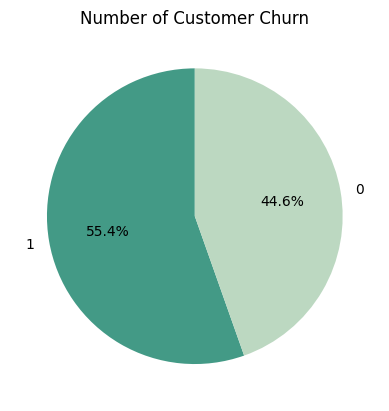

In [33]:
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#439a86', '#bcd8c1'])
plt.title('Number of Customer Churn')
plt.show()

There are more than 50% of customers who have churned, which is around 40,050 people. Therefore, we can conclude that the majority of customers have already cancelled the service.

In [34]:
#customers who cancelled the internet service
churn = df.loc[df['churn'] == 1]

#customers who did not cancel the internet service
not_churn = df.loc[df['churn'] == 0]

### How do churned and non-churned customers differ in their subscription package choices?

In [35]:
df['subscribe'].value_counts()

,count
subscribe,
tv only,34739
both,24183
internet only,13350
movie only,2


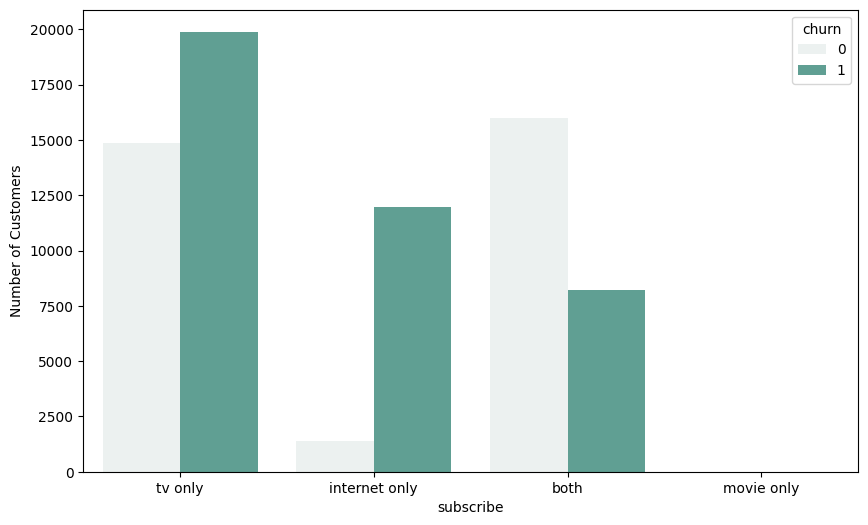

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='subscribe', hue='churn', data=df, palette='light:#5A9')
plt.ylabel('Number of Customers')
plt.show()

Based on the graph, customers who stopped using the service mostly came from customers who subscribed to the internet only. Meanwhile, customers who did not stop using the service mostly came from customers who subscribed to the internet, TV and also movies.

### For internet only subscriber

In [37]:
#filter the dataframe for customers that subscribe internet only
internet_subs = df[df['subscribe'] == 'internet only']

internet_subs

,customer_id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,subscribe
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1,internet only
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1,internet only
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1,internet only
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1,internet only
7,84,0,0,5.48,14,0.00,1,0.0,0.0,0,1,internet only
...,...,...,...,...,...,...,...,...,...,...,...,...
72259,1689452,0,0,0.07,25,0.00,0,70.7,6.6,0,1,internet only
72262,1689476,0,0,0.00,1,0.61,0,0.0,0.0,0,1,internet only
72264,1689533,0,0,0.01,0,0.00,0,0.0,0.0,0,1,internet only
72267,1689600,0,0,0.08,0,0.00,0,84.2,5.0,0,1,internet only


#### How the distribution of subscription age?

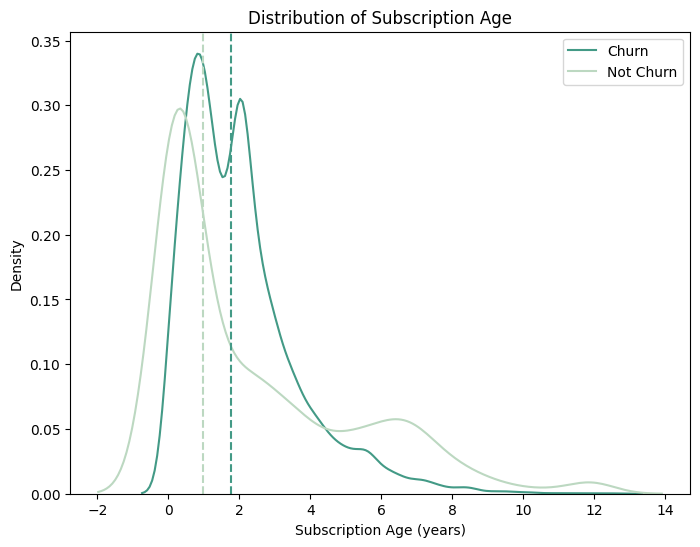

In [38]:
#customers who canceled the service in 'internet only' subscribe
churn_internet = internet_subs[internet_subs['churn'] == 1]

#customers who stay in 'internet only' subscribe
not_churn_internet = internet_subs[internet_subs['churn'] == 0]

#check subscription age distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(churn_internet['subscription_age'], label='Churn', color='#439a86')
sns.kdeplot(not_churn_internet['subscription_age'], label='Not Churn', color='#bcd8c1')

#calculate median value
median_churn = churn_internet['subscription_age'].median()
median_not_churn = not_churn_internet['subscription_age'].median()

#add vertical lines for medians
plt.axvline(median_churn, color='#439a86', linestyle='--')
plt.axvline(median_not_churn, color='#bcd8c1', linestyle='--')

plt.title('Distribution of Subscription Age')
plt.xlabel('Subscription Age (years)')
plt.legend()
plt.show()

* Both churned and non-churned customers show similar patterns. For example, in the 0-2 years range, both have a high concentration, but after 2 years, the numbers decrease, with churned customers decreasing more sharply.
* Churned customers usually have shorter subscription ages compared to non-churned customers. This suggest that most customers who cancelled the service do within the first few years of their subscription
* Customers tend to churn when their subscription age is around 1-2 years


#### how many service failures did they experience?

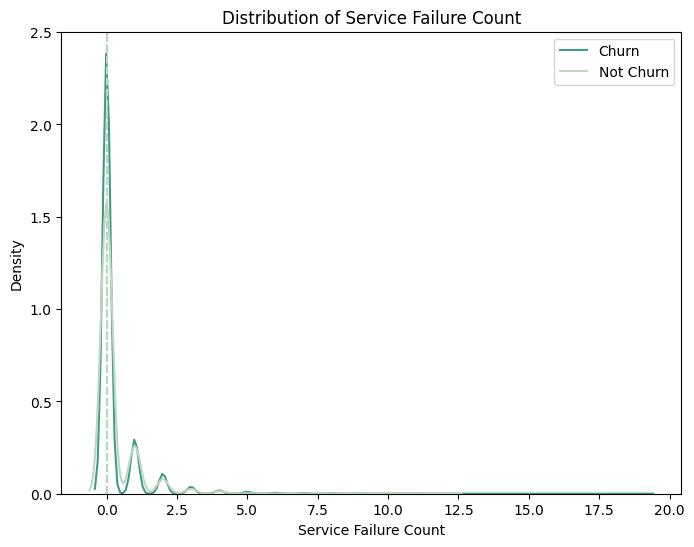

In [39]:
plt.figure(figsize=(8, 6))
sns.kdeplot(churn_internet['service_failure_count'], label='Churn', color='#439a86')
sns.kdeplot(not_churn_internet['service_failure_count'], label='Not Churn', color='#bcd8c1')

#calculate median value
median_churn = churn_internet['service_failure_count'].median()
median_not_churn = not_churn_internet['service_failure_count'].median()

#add vertical lines for medians
plt.axvline(median_churn, color='#439a86', linestyle='--')
plt.axvline(median_not_churn, color='#bcd8c1', linestyle='--')

plt.title('Distribution of Service Failure Count')
plt.xlabel('Service Failure Count')
plt.legend()
plt.show()

* For service failures, both customers who churn and those who did not churn show the same pattern. Most customers (both churned and non-churned) have very low service failure counts close to 0.

* Churned customers have a slightly higher proportion of experiencing more service failures than non-churn customers. This indicates that service failures, may contribute to customer dissatisfaction and churn.

#### How the distribution of the bill average?

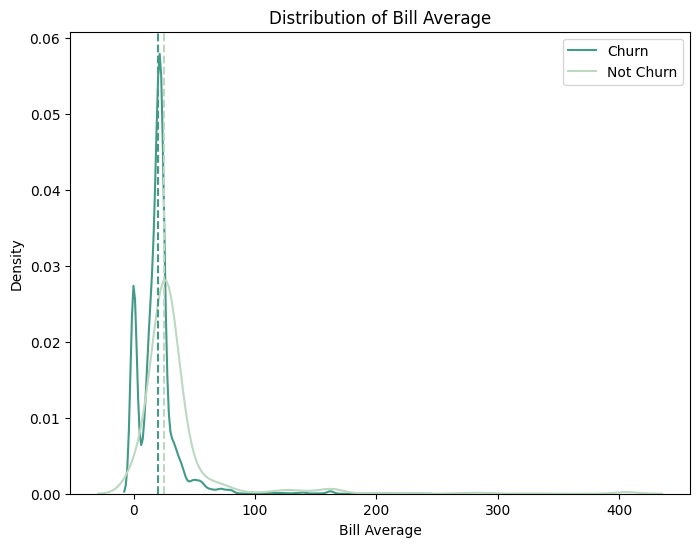

In [41]:
plt.figure(figsize=(8, 6))
sns.kdeplot(churn_internet['bill_avg'], label='Churn', color='#439a86')
sns.kdeplot(not_churn_internet['bill_avg'], label='Not Churn', color='#bcd8c1')

#calculate median value
median_churn = churn_internet['bill_avg'].median()
median_not_churn = not_churn_internet['bill_avg'].median()

#add vertical lines for medians
plt.axvline(median_churn, color='#439a86', linestyle='--')
plt.axvline(median_not_churn, color='#bcd8c1', linestyle='--')

plt.title('Distribution of Bill Average')
plt.xlabel('Bill Average')
plt.legend()
plt.show()

* From the graph show that most customers paying less than $50 (lower bill averages)
* Churned customers tend to have slightly lower bill averages than those who do not churn
* This may indicate that churned customers may still feel that the cost is too high for them or may not see any added value for them to continue subscribing.

#### How the distribution of the remaining contract?

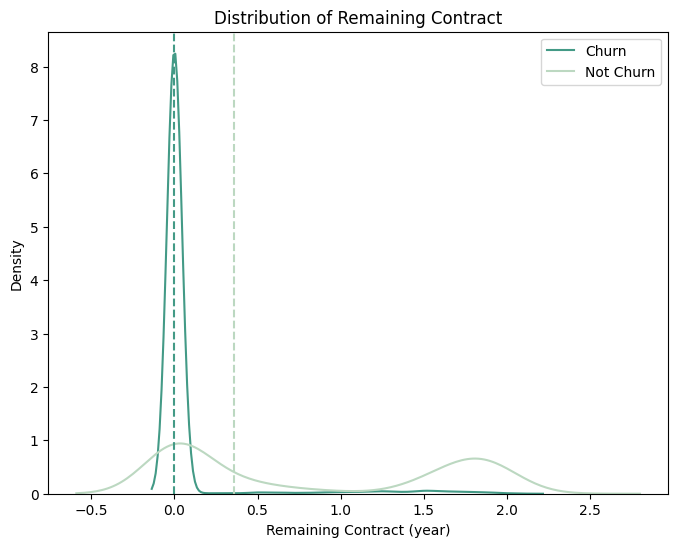

In [43]:
plt.figure(figsize=(8, 6))
sns.kdeplot(churn_internet['remaining_contract'], label='Churn', color='#439a86')
sns.kdeplot(not_churn_internet['remaining_contract'], label='Not Churn', color='#bcd8c1')

#calculate median value
median_churn = churn_internet['remaining_contract'].median()
median_not_churn = not_churn_internet['remaining_contract'].median()

#add vertical lines for medians
plt.axvline(median_churn, color='#439a86', linestyle='--')
plt.axvline(median_not_churn, color='#bcd8c1', linestyle='--')

plt.title('Distribution of Remaining Contract')
plt.xlabel('Remaining Contract (year)')
plt.legend()
plt.show()

* There is a significant difference between churned and non-churned customers. Churned customers mostly does not have an active contract while non-churned customers have a long remaining contract. because if they cancel while in contract they have to pay penalty.
* There are exceptions with customers who had contract but still churned. This may suggest dissatisfaction with service despite the contractual penalty.

#### How the distribution of download over limit?

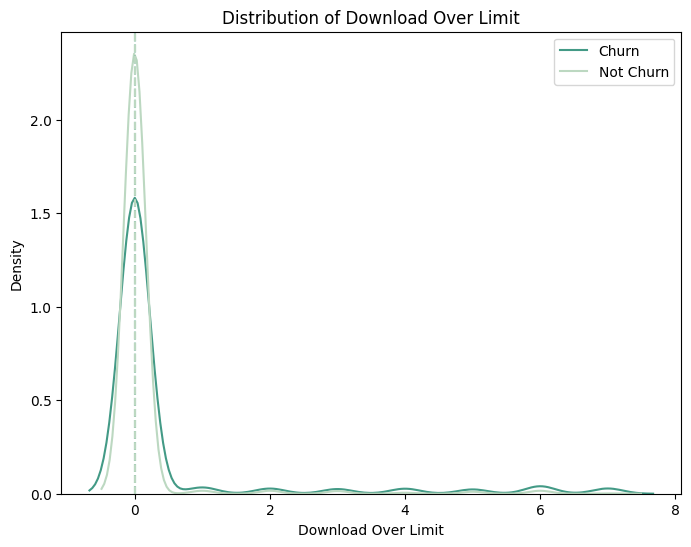

In [45]:
plt.figure(figsize=(8, 6))
sns.kdeplot(churn_internet['download_over_limit'], label='Churn', color='#439a86')
sns.kdeplot(not_churn_internet['download_over_limit'], label='Not Churn', color='#bcd8c1')

#calculate median value
median_churn = churn_internet['download_over_limit'].median()
median_not_churn = not_churn_internet['download_over_limit'].median()

#add vertical lines for medians
plt.axvline(median_churn, color='#439a86', linestyle='--')
plt.axvline(median_not_churn, color='#bcd8c1', linestyle='--')

plt.title('Distribution of Download Over Limit')
plt.xlabel('Download Over Limit')
plt.legend()
plt.show()

* For download over limit, both customers who churn and those who did not churn show the same pattern. Most customers (both churned and non-churned) have very low download over limit close to 0. this means that most of the customers generally stay within their data limits

* Churned customers have a slightly more likely to exceed their data limits than non-churn customers so they are charged extra, which causes dissatisfaction.

## Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

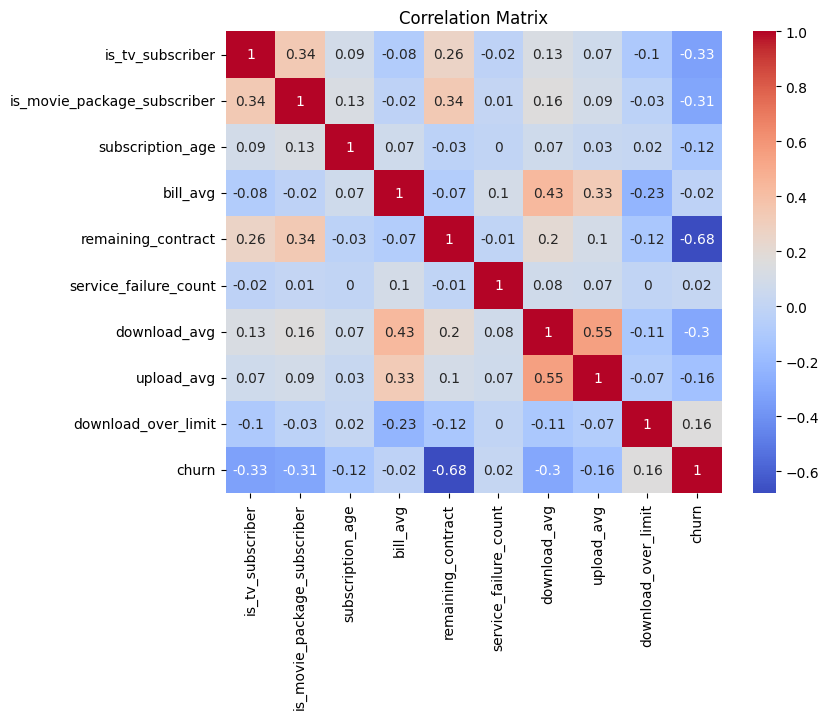

In [47]:
df_corr = df.drop(['customer_id', 'subscribe'], axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(method='pearson'). round(2), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize= 12)

From the correlation matrix, can be concluded that no two numerical variables are highly correlated

In [48]:
#isolate the categorical variables
categorical_var = [col for col in df.columns if df[col].nunique() <= 19 and col not in 'churn']
categorical_var

['is_tv_subscriber',
 'is_movie_package_subscriber',
 'service_failure_count',
 'download_over_limit',
 'subscribe']

In [49]:
#isolate the numerical variables
numerical_var = [col for col in df.columns if df[col].dtype != "object"
                                          and df[col].nunique() > 19
                                          and col not in 'customer_id']
numerical_var

['subscription_age',
 'bill_avg',
 'remaining_contract',
 'download_avg',
 'upload_avg']

In [50]:
#drop column that do not affect the dependent variable
df_prepared = df.drop(['customer_id'], axis=1)
df_prepared.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,subscribe
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0,tv only
1,0,0,8.22,0,0.00,0,0.0,0.0,0,1,internet only
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1,tv only
3,0,0,6.87,21,0.00,1,0.0,0.0,0,1,internet only
4,0,0,6.39,0,0.00,0,0.0,0.0,0,1,internet only


##Feature Scaling

In [51]:
label_encoder = LabelEncoder()

#encode subscribe column
label_encoder.fit(df_prepared['subscribe'])
df_prepared['subscribe'] = label_encoder.transform(df_prepared['subscribe'])

df_prepared.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,subscribe
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0,3
1,0,0,8.22,0,0.00,0,0.0,0.0,0,1,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1,3
3,0,0,6.87,21,0.00,1,0.0,0.0,0,1,1
4,0,0,6.39,0,0.00,0,0.0,0.0,0,1,1


In [52]:
#scale numerical variables using RobustScaler since it handles outliers better

mmscaler = RobustScaler()
df_prepared[numerical_var] = mmscaler.fit_transform(df_prepared[numerical_var])
df_prepared.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,subscribe
0,1,0,4.206751,0.666667,0.134615,0,-0.363296,0.046512,0,0,3
1,0,0,2.632911,-2.111111,0.000000,0,-0.520599,-0.488372,0,1,1
2,1,0,2.924051,-0.333333,0.000000,0,-0.264045,-0.279070,0,1,3
3,0,0,2.063291,0.222222,0.000000,1,-0.520599,-0.488372,0,1,1
4,0,0,1.860759,-2.111111,0.000000,0,-0.520599,-0.488372,0,1,1


the data has been made into a normal distribution

## Modelling

In [53]:
#train-test split
X = df_prepared.drop('churn', axis=1)
y = df_prepared['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###Logistic Regression

In [54]:
#train the model

model = LogisticRegression()
model.fit(X_train, y_train)

#make the prediction
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [55]:
#evaluating the model with performance metrics (train data)

lg_acc_train = accuracy_score(y_train, y_pred_train)
lg_pre_train = precision_score(y_train, y_pred_train)
lg_re_train = recall_score(y_train, y_pred_train)
lg_f1_train = f1_score(y_train, y_pred_train)

metrics_train = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (lg_acc_train * 100.0)), ("%.2f" % (lg_pre_train * 100.0)),
               ("%.2f" % (lg_re_train * 100.0)), ("%.2f" % (lg_f1_train * 100.0))]
}

metrics_df_train = pd.DataFrame(metrics_train)
metrics_df_train

,Metrics,Values
0,Accuracy,87.19
1,Precision,86.00
2,Recall,91.86
3,F1,88.83


In [56]:
#evaluating the model with performance metrics (test data)

lg_acc_test = accuracy_score(y_test, y_pred_test)
lg_pre_test = precision_score(y_test, y_pred_test)
lg_re_test = recall_score(y_test, y_pred_test)
lg_f1_test = f1_score(y_test, y_pred_test)

metrics_test = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (lg_acc_test * 100.0)), ("%.2f" % (lg_pre_test * 100.0)),
               ("%.2f" % (lg_re_test * 100.0)), ("%.2f" % (lg_f1_test * 100.0))]
}

metrics_df_test = pd.DataFrame(metrics_test)
metrics_df_test

,Metrics,Values
0,Accuracy,87.16
1,Precision,86.29
2,Recall,91.23
3,F1,88.69


In [57]:
#evaluating the model with confusion matrix

cf = confusion_matrix(y_pred_test, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  7278
True Negative :  5321
False Positive:  700
False Negative:  1156


###Decision Tree

In [58]:
#train the model

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#make the prediction
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [59]:
#evaluating the model with performance metrics (train data)

dt_acc_train = accuracy_score(y_train, y_pred_train)
dt_pre_train = precision_score(y_train, y_pred_train)
dt_re_train = recall_score(y_train, y_pred_train)
dt_f1_train = f1_score(y_train, y_pred_train)

metrics_train = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (dt_acc_train * 100.0)), ("%.2f" % (dt_pre_train * 100.0)),
               ("%.2f" % (dt_re_train * 100.0)), ("%.2f" % (dt_f1_train * 100.0))]
}

metrics_df_train = pd.DataFrame(metrics_train)
metrics_df_train

,Metrics,Values
0,Accuracy,100.00
1,Precision,100.00
2,Recall,100.00
3,F1,100.00


In [60]:
#evaluating the model with performance metrics (test data)

dt_acc_test = accuracy_score(y_test, y_pred_test)
dt_pre_test = precision_score(y_test, y_pred_test)
dt_re_test = recall_score(y_test, y_pred_test)
dt_f1_test = f1_score(y_test, y_pred_test)

metrics_test = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (dt_acc_test * 100.0)), ("%.2f" % (dt_pre_test * 100.0)),
               ("%.2f" % (dt_re_test * 100.0)), ("%.2f" % (dt_f1_test * 100.0))]
}

metrics_df_test = pd.DataFrame(metrics_test)
metrics_df_test

,Metrics,Values
0,Accuracy,90.88
1,Precision,91.71
2,Recall,91.76
3,F1,91.74


In [61]:
#evaluating the model with confusion matrix

cf = confusion_matrix(y_pred_test, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  7321
True Negative :  5815
False Positive:  657
False Negative:  662


### Random Forest

In [62]:
#train the model

model = RandomForestClassifier()
model.fit(X_train, y_train)

#make the prediction
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [63]:
#evaluating the model with performance metrics (train data)

rf_acc_train = accuracy_score(y_train, y_pred_train)
rf_pre_train = precision_score(y_train, y_pred_train)
rf_re_train = recall_score(y_train, y_pred_train)
rf_f1_train = f1_score(y_train, y_pred_train)

metrics_train = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (rf_acc_train * 100.0)), ("%.2f" % (rf_pre_train * 100.0)),
               ("%.2f" % (rf_re_train * 100.0)), ("%.2f" % (rf_f1_train * 100.0))]
}

metrics_df_train = pd.DataFrame(metrics_train)
metrics_df_train

,Metrics,Values
0,Accuracy,100.00
1,Precision,100.00
2,Recall,99.99
3,F1,100.00


In [64]:
#evaluating the model with performance metrics (test data)

rf_acc_test = accuracy_score(y_test, y_pred_test)
rf_pre_test = precision_score(y_test, y_pred_test)
rf_re_test = recall_score(y_test, y_pred_test)
rf_f1_test = f1_score(y_test, y_pred_test)

metrics_test = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (rf_acc_test * 100.0)), ("%.2f" % (rf_pre_test * 100.0)),
               ("%.2f" % (rf_re_test * 100.0)), ("%.2f" % (rf_f1_test * 100.0))]
}

metrics_df_test = pd.DataFrame(metrics_test)
metrics_df_test

,Metrics,Values
0,Accuracy,93.84
1,Precision,95.44
2,Recall,93.29
3,F1,94.35


In [65]:
#evaluating the model with confusion matrix

cf = confusion_matrix(y_pred_test, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  7443
True Negative :  6121
False Positive:  535
False Negative:  356


###LightGBM

In [66]:
#build the lightgbm model

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

#predict the results
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

[LightGBM] [Info] Number of positive: 32072, number of negative: 25747
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 57819, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554697 -> initscore=0.219665
[LightGBM] [Info] Start training from score 0.219665


In [67]:
#evaluating the model with performance metrics (train data)

lgb_acc_train = accuracy_score(y_train, y_pred_train)
lgb_pre_train = precision_score(y_train, y_pred_train)
lgb_re_train = recall_score(y_train, y_pred_train)
lgb_f1_train = f1_score(y_train, y_pred_train)

metrics_train = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (lgb_acc_train * 100.0)), ("%.2f" % (lgb_pre_train * 100.0)),
               ("%.2f" % (lgb_re_train * 100.0)), ("%.2f" % (lgb_f1_train * 100.0))]
}

metrics_df_train = pd.DataFrame(metrics_train)
metrics_df_train

,Metrics,Values
0,Accuracy,94.68
1,Precision,96.09
2,Recall,94.25
3,F1,95.16


In [68]:
#evaluating the model with performance metrics (test data)

lgb_acc_test = accuracy_score(y_test, y_pred_test)
lgb_pre_test = precision_score(y_test, y_pred_test)
lgb_re_test = recall_score(y_test, y_pred_test)
lgb_f1_test = f1_score(y_test, y_pred_test)

metrics_test = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (lgb_acc_test * 100.0)), ("%.2f" % (lgb_pre_test * 100.0)),
               ("%.2f" % (lgb_re_test * 100.0)), ("%.2f" % (lgb_f1_test * 100.0))]
}

metrics_df_test = pd.DataFrame(metrics_test)
metrics_df_test

,Metrics,Values
0,Accuracy,93.86
1,Precision,95.34
2,Recall,93.44
3,F1,94.39


In [69]:
#evaluating the model with confusion matrix

cf = confusion_matrix(y_pred_test, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  7455
True Negative :  6113
False Positive:  523
False Negative:  364


### XGBoost

In [70]:
#build the xgboost model

model = XGBClassifier()
model.fit(X_train, y_train)

#predict the results
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [71]:
#evaluating the model with performance metrics (train data)

xgb_acc_train = accuracy_score(y_train, y_pred_train)
xgb_pre_train = precision_score(y_train, y_pred_train)
xgb_re_train = recall_score(y_train, y_pred_train)
xgb_f1_train = f1_score(y_train, y_pred_train)

metrics_train = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (xgb_acc_train * 100.0)), ("%.2f" % (xgb_pre_train * 100.0)),
               ("%.2f" % (xgb_re_train * 100.0)), ("%.2f" % (xgb_f1_train * 100.0))]
}

metrics_df_train = pd.DataFrame(metrics_train)
metrics_df_train

,Metrics,Values
0,Accuracy,95.58
1,Precision,96.64
2,Recall,95.35
3,F1,95.99


In [72]:
#evaluating the model with performance metrics (test data)

xgb_acc_test = accuracy_score(y_test, y_pred_test)
xgb_pre_test = precision_score(y_test, y_pred_test)
xgb_re_test = recall_score(y_test, y_pred_test)
xgb_f1_test = f1_score(y_test, y_pred_test)

metrics_test = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (xgb_acc_test * 100.0)), ("%.2f" % (xgb_pre_test * 100.0)),
               ("%.2f" % (xgb_re_test * 100.0)), ("%.2f" % (xgb_f1_test * 100.0))]
}

metrics_df_test = pd.DataFrame(metrics_test)
metrics_df_test

,Metrics,Values
0,Accuracy,93.82
1,Precision,95.19
2,Recall,93.52
3,F1,94.35


In [73]:
#evaluating the model with confusion matrix

cf = confusion_matrix(y_pred_test, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  7461
True Negative :  6100
False Positive:  517
False Negative:  377


###Comparing Models

I will focus on the recall score because I want to prevent prediction errors, namely customers who churn but are classified as not churned.

In [74]:
compare = pd.DataFrame(
    [
        ['Logistic Regression', lg_re_train * 100.0, lg_re_test * 100.0],
        ['Decision Tree', dt_re_train * 100.0, dt_re_test * 100.0],
        ['Random Forest', rf_re_train * 100.0, rf_re_test * 100.0],
        ['LightGBM', lgb_re_train * 100.0, lgb_re_test * 100.0],
        ['XGBoost', xgb_re_train * 100.0, xgb_re_test * 100.0]
    ],
    columns = ['model', 'recall_train', 'recall_test']
)

compare

,model,recall_train,recall_test
0,Logistic Regression,91.862060,91.225871
1,Decision Tree,99.996882,91.764853
2,Random Forest,99.993764,93.294059
3,LightGBM,94.253555,93.444472
4,XGBoost,95.354203,93.519679


**Good Fit Models**: Logistic Regression, LightGBM, XGBoost

**Overfitting Models**: Decision Tree, Random Forest


The decision tree and random forest have a perfect recall on the training data, but the recall drops significantly on the test data. This suggests that the model is overfitting the training data. Meanwhile for logistic regression, lightgbm and xgboost, the recall scores are very close between the training and test so that it can call a good fit